# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Dzaky Fallah Muflih
- **Email:** dzakyfallah51@gmail.com
- **ID Dicoding:** dzakyfallah

## Menentukan Pertanyaan Bisnis

- Musim apa yang memiliki dominan terbanyak merental sepeda?
- Seberapa sering penggunaan casual dan registered di hari biasa?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [166]:
bike_day_df = pd.read_csv("https://raw.githubusercontent.com/dzakfm/dataset_bike/refs/heads/main/day.csv")
bike_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [168]:
bike_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [170]:
bike_day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [172]:
print("Jumlah Duplikasi : ",bike_day_df.duplicated().sum())

Jumlah Duplikasi :  0


In [174]:
bike_day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Pada dataset bike_day_df di kolom "dteday" terdapat kesalahan "Dtype" (object diubah menjadi datetime).

### Cleaning Data

In [176]:
datetime_columns = ["dteday"]
for column in datetime_columns:
    bike_day_df[column] = pd.to_datetime(bike_day_df[column])

In [178]:
bike_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Dtype di dataset bike_day_df pada kolom dteday, object diubah menjadi datetime.

## Exploratory Data Analysis (EDA)

### Explore ...

In [180]:
bike_day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [182]:
bike_day_df.groupby(by="season").agg({
    "cnt" : "nunique"
})

,cnt
season,
1,179
2,182
3,188
4,176


In [184]:
bike_day_df.groupby(by="weekday").agg({
    "cnt" : "nunique",
    "casual" : "sum",
    "registered" : "sum"
}).sort_values(by="casual", ascending=False)

,cnt,casual,registered
weekday,,,
6,102,153852,323955
0,104,140521,303506
5,104,78238,409552
1,104,70784,384719
4,103,61460,423935
2,104,57843,411266
3,103,57319,415729


In [186]:
bike_day_df.groupby(by="weekday").agg({
    "cnt" : "nunique",
    "casual" : "sum",
    "registered" : "sum"
}).sort_values(by="registered", ascending=False)

,cnt,casual,registered
weekday,,,
4,103,61460,423935
3,103,57319,415729
2,104,57843,411266
5,104,78238,409552
1,104,70784,384719
6,102,153852,323955
0,104,140521,303506


**Insight:**
- Rental terbanyak pada hari kerja berdominan pada musim ke-3
- Casual terbanyak ada pada hari ke-6 dan registered pada hari ke-4

## Visualization & Explanatory Analysis

### Pertanyaan 1:

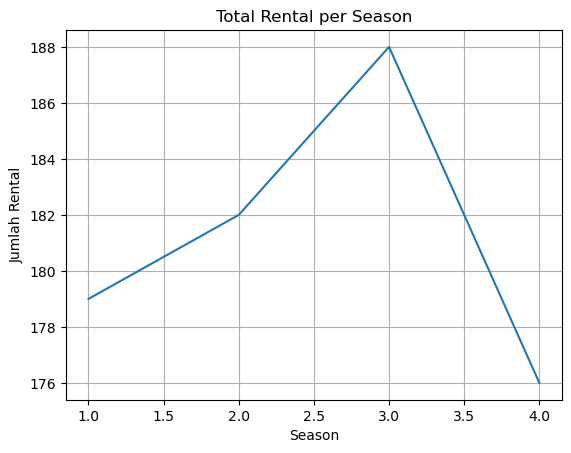

In [224]:
season_rental = bike_day_df.groupby(by="season").agg({
    "cnt": "nunique"
}).reset_index()

plt.plot(season_rental['season'], season_rental['cnt'])

plt.xlabel('Season')
plt.ylabel('Jumlah Rental')
plt.title('Total Rental per Season')
plt.grid(True)

plt.show()

### Pertanyaan 2:

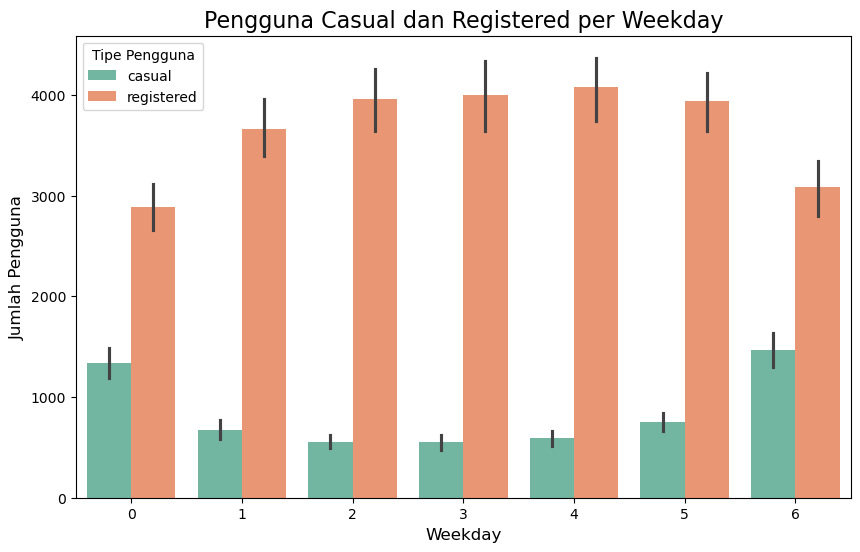

In [222]:
weekday_rental = bike_day_df.melt(id_vars=["weekday"], value_vars=["casual", "registered"],
                                              var_name="Tipe Pengguna", value_name="Jumlah Pengguna")

plt.figure(figsize=(10, 6))
sns.barplot(x="weekday", y="Jumlah Pengguna", hue="Tipe Pengguna", data=weekday_rental, palette="Set2")

plt.title("Pengguna Casual dan Registered per Weekday", fontsize=16)
plt.xlabel("Weekday", fontsize=12)
plt.ylabel("Jumlah Pengguna", fontsize=12)
plt.show()

In [226]:
bike_day_df.to_csv("all_data.csv", index=False)

## Conclusion

- Conclusion pertanyaan 1:
    Pada Season 1 menunjukan 179 dirental, season 2 menunjukan 182 dirental, season 3 menunjukan 188 dirental, seasoan 4 menunjukan 176 dirental,
    maka dominan rental sepeda di season ke-3.

- Conclusion pertanyaan 2
   Penggunaan terbanyak untuk Casual per Weekday adalah hari ke-6, sedangkan untuk Registered per Weekday adalah hari ke-4.  